<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-demo/blob/main/mashine_learning_in_banking_case/mashine_learning_in_banking_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<b> Цели и задачи проекта: </b>

Составить модель, прогнозирующую уход клиента из «Бета-Банка»

<b> Данные: </b>

Датасет (10000 строк) с данными о клиентах банка по признакам: 
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
 
<b> Целевой признак: </b>  Exited — факт ухода клиента

<b> План работы: </b>

- Чтение и предварительная обработка данных 
- Анализ проблемы дисбаланса данных 
- Применение методов борьбы с дисбалансов
- Выбор оптимального алгоритма, прогнозирующего уход клиента 
- Тестирование выбранного алгоритма
- Выводы 

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve

Загрузка всех библиотек 

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')
data = df.copy()
display (data.head(5))
print (data.info())
print (data.duplicated().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
0


Открытие файла и изучение его. **Выводы** Проверка на явные дубликаты - дубликатов нет.
Есть пропуски в столбце Tenure (сколько лет человек является клиентом банка - новые клиенты?) Дополнительно смотрю значения столбца Tenure 


In [ ]:
print(data['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


Присутствуют значения и 0, и nan. 

In [ ]:
print(data['Exited'].unique())

print(data.groupby(data['Exited']).count())

[1 0]
        RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
Exited                                                                         
0            7963        7963     7963         7963       7963    7963  7963   
1            2037        2037     2037         2037       2037    2037  2037   

        Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited                                                              
0         7237     7963           7963       7963            7963   
1         1854     2037           2037       2037            2037   

        EstimatedSalary  
Exited                   
0                  7963  
1                  2037  


In [ ]:
data['Tenure']= data['Tenure'].fillna(0)
print(data['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]


In [ ]:
print(data['IsActiveMember'].unique())

[1 0]


Интересно, что за значения в столбце активности клиента. **Вывод** [1 0] Булиевы. 

In [ ]:
print(data['Gender'].unique())

['Female' 'Male']


Значения в стобце Gender решила обработать в числовые значения, в один новый столбец.  

In [ ]:
data['Male']= pd.get_dummies(data['Gender'], drop_first=True)
print(pd.get_dummies(data['Gender'], drop_first=True).head(20))
display (data.head(5)) 

    Male
0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     1
17     0
18     1
19     0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,0


**Проведена обработка** Колонка Gender преобразована в колонку 'Male' техникой OHE и добавлена в датафрейм

In [ ]:
print(data['Geography'].unique())

['France' 'Spain' 'Germany']


Значений всего 3. В них с точки зрения исследования может быть практический смысл. Требуется их перекодировать. Логично будет добавить 3 столбца с названиями стран. "drop_first=True" в этом случае решила не применять. 

In [ ]:
print(pd.get_dummies(data['Geography']))
print(pd.get_dummies(data, columns= ['Geography']))
print(data.head())
data_new = pd.get_dummies(data, columns= ['Geography'])
print(data_new.head())

## Исследование задачи

In [ ]:
features = data_new.drop(['Exited','RowNumber','CustomerId','Surname','Gender', 'Geography_Spain' ], axis=1)
target = data_new['Exited']
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=12345)
print('features_train shape:', features_train.shape)
print('features_valid shape:', features_valid.shape)
print('features_test shape:', features_test.shape)
print('target_train shape:', target_train.shape)
print('target_valid shape:', target_valid.shape)
print('target_test shape:', target_test.shape)

features_train shape: (6000, 11)
features_valid shape: (2000, 11)
features_test shape: (2000, 11)
target_train shape: (6000,)
target_valid shape: (2000,)
target_test shape: (2000,)


**Результаты** Без учета дисбаланса, данные разбиты на 3 части: обучающая выборка (60%), валидизационная (20%), тестовая (20%). Убраны столбцы с несущественной для исследования информацией (имена, порядковые номера) а также столбецы 'Geography_Spain' и 'Gender', т.к. дублируют оставшиеся 

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Recall=',recall_score(target_valid, predictions_valid))
print('Precision', precision_score(target_valid,predictions_valid))
print('F1',f1_score(target_valid,predictions_valid))
print("Accuracy модели логистической регрессии:", accuracy)

Recall= 0.04784688995215311
Precision 0.3389830508474576
F1 0.08385744234800838
Accuracy модели логистической регрессии: 0.7815


**Результаты** Без учета дисбаланса классов применена модель логистической регрессии и посчитана Accuracy модели (не показательная метрика в данном случае, как оказалось) и другие метрики (ниже чем нужно). 

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print('Recall=',recall_score(target_valid, predictions_valid))
print('Precision', precision_score(target_valid,predictions_valid))
print('F1',f1_score(target_valid,predictions_valid))
print("Accuracy модели дерево решений:", accuracy)

Recall= 0.4138755980861244
Precision 0.7792792792792793
F1 0.5406249999999999
Accuracy модели дерево решений: 0.853


**Результаты** Без учета дисбаланса классов применена модель "дерево решений".  Accuracy выше, чем у логистической регрессии 

In [ ]:
target_pred_constant = pd.Series(0, index=target.index)

print('Accuracy константной модели',accuracy_score(target, target_pred_constant))

Accuracy константной модели 0.7963


**Оценка моделей в сравнении с константной** для сравнения применена константная модель: любому объекту она прогнозирует target=0 (по смыслу - клиент не уйдет из банка). Поскольку в целевых признаках дисбаланс 1\4 она тоже дает хороший результат, даже выше, чем регрессия. Значит модели не очень информативны в данном случае, и надо учитывать дисбаланс и применять другие метрики. 

## Борьба с дисбалансом

**Решение** 1) Масштабируем числовые признаки 2)Пробуем разные модели с вариациями гиперпараметров с учетом дисбаланса.

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]= scaler.transform(features_valid[numeric])
features_test[numeric]= scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
print(features_train.head(5))
print(features_train.shape) 
print(data_new.head(5))

**Стандартизация данных** Числовые данные в колонках датасета разной рамерности. Применяем один из методов масштабирования — стандартизацию данных. В результатах настораживает появление отрицательных значений. Уточнила, это допускается.

In [ ]:
%%time
best_model = None
best_result = 0
for depth in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) 
    print(model, '|', 'глубина=',depth,'|', result)
    print("F1:", f1_score(target_valid, predicted_valid))
    print("max_depth =", depth, ": ", end='')
    print('Recall=',recall_score(target_valid, predicted_valid))
    print('Precision', precision_score(target_valid,predicted_valid))
    print('матрицa ошибок',confusion_matrix(target_valid, predicted_valid))
    if result > best_result:
        best_model = model
        best_result = result  
print("F1:", best_result)
print('Cамая эффективная модель - best_model',best_model)
    
print(data_new.head())    

DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=12345) | глубина= 1 | 0.4994903160040775
F1: 0.4994903160040775
max_depth = 1 : Recall= 0.5861244019138756
Precision 0.4351687388987567
матрицa ошибок [[1264  318]
 [ 173  245]]
DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=12345) | глубина= 2 | 0.541015625
F1: 0.541015625
max_depth = 2 : Recall= 0.6626794258373205
Precision 0.4570957095709571
матрицa ошибок [[1253  329]
 [ 141  277]]
DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=12345) | глубина= 3 | 0.541015625
F1: 0.541015625
max_depth = 3 : Recall= 0.6626794258373205
Precision 0.4570957095709571
матрицa ошибок [[1253  329]
 [ 141  277]]
DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=12345) | глубина= 4 | 0.5277777777777778
F1: 0.5277777777777778
max_depth = 4 : Recall= 0.7727272727272727
Precision 0.40074441687344914
матрицa ошибок [[1099  483]
 [  95  323]]
DecisionTreeClassif

**Решение** Был проведен подбор гиперпараметров к модели DecisionTreeClassifier
с учетом дисбаланса, добавлено (class_weight='balanced')
Самой эффективной по метрике F1 оказалась модель с  max_depth=5, 
(глубина= 5 )
F1: 0.5963791267305644
max_depth = 5 : 
Recall= 0.6698564593301436
Precision 0.5374280230326296
матрицa ошибок 
[[1341  241]
 [ 138  280]]
 Исходя их практической задачи, в предполагаю что в матрице ошибок важнее мининизировать (FN в левом нижнем углу) и увеличить Recall.

С учетом дисбаланса попробуем применить class_weight='balanced' на других моделях

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('Recall=',recall_score(target_valid, predictions_valid))
print('Precision', precision_score(target_valid,predictions_valid))
print('матрицa ошибок',confusion_matrix(target_valid, predictions_valid))
print("F1:", f1_score(target_valid, predictions_valid))

Recall= 0.6842105263157895
Precision 0.3803191489361702
матрицa ошибок [[1116  466]
 [ 132  286]]
F1: 0.4888888888888888


**Решение** Применено взвешивание классов в модели логистической регрессии, F1 меньше целевого значения, другие метрики и матрица ошибок тоже недостаточные. 

In [ ]:
%%time
best_model = None
best_result = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,class_weight='balanced') 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        print(model, '|', 'est=',est,'|', 'depth=',depth,'|', result)
        print("F1:", f1_score(target_valid, predicted_valid))
        if result > best_result:
            best_model = model
            best_result = result 
        
print("F1:", best_result)
print('Cамая эффективная модель - best_model',best_model)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=50,
                       random_state=12345) | est= 50 | depth= 2 | 0.5575304022450888
F1: 0.5575304022450888
RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=12345) | est= 100 | depth= 2 | 0.5762394761459307
F1: 0.5762394761459307
RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=150,
                       random_state=12345) | est= 150 | depth= 2 | 0.576303317535545
F1: 0.576303317535545
RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=200,
                       random_state=12345) | est= 200 | depth= 2 | 0.5765258215962441
F1: 0.5765258215962441
RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=250,
                       random_state=12345) | est= 250 | depth= 2 | 0.5767790262172284
F1: 0.5767790262172284
RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=300,
                       ran

**Решение** Попробуем другие методы борьбы с дисбалансом 

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
print('Recall=',recall_score(target_valid, predictions_valid))
print('Precision', precision_score(target_valid,predictions_valid))
print("F1:", f1_score(target_valid, predictions_valid))

Recall= 0.6842105263157895
Precision 0.3803191489361702
F1: 0.4888888888888888


**Выводы** Методом upsampling  на модели LogisticRegression не удалось достигнуть целевого значения F1. 

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
print('Recall=',recall_score(target_valid, predictions_valid))
print('Precision', precision_score(target_valid,predictions_valid))
print("F1:", f1_score(target_valid, predictions_valid))

Recall= 0.6818181818181818
Precision 0.3820375335120643
F1: 0.4896907216494845


**Вывод** метод downsampling на LogisticRegression тоже не дал целевого F1.  

**Общий вывод по решению проблемы дисбаланса** Подходящий результат (F1 от 0,59) удалось получить в 2 случаях: 
- DecisionTreeClassifier ((class_weight='balanced', max_depth=5, random_state=12345)
- RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, est= 100 )


## Тестирование модели

**тестирование модели RandomForestClassifier**

In [ ]:
%%time
model = RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, n_estimators=100)
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)
accuracy_score(target_test, test_predictions)
accuracy_test=accuracy_score(target_test, test_predictions)
print("F1:", f1_score(target_test, test_predictions)) 

F1: 0.5989304812834224
CPU times: user 647 ms, sys: 44 ms, total: 691 ms
Wall time: 716 ms


**Выводы:** На тестовой выборке модели F1 модели RandomForestClassifier достигает целевого уровня 0,59

Порог = 0.20 | Точность = 0.285, Полнота = 0.945
Порог = 0.22 | Точность = 0.299, Полнота = 0.938
Порог = 0.24 | Точность = 0.310, Полнота = 0.916
Порог = 0.26 | Точность = 0.326, Полнота = 0.904
Порог = 0.28 | Точность = 0.345, Полнота = 0.900
Порог = 0.30 | Точность = 0.359, Полнота = 0.883
Порог = 0.32 | Точность = 0.374, Полнота = 0.856
Порог = 0.34 | Точность = 0.400, Полнота = 0.847
Порог = 0.36 | Точность = 0.427, Полнота = 0.840
Порог = 0.38 | Точность = 0.443, Полнота = 0.813
Порог = 0.40 | Точность = 0.464, Полнота = 0.792
Порог = 0.42 | Точность = 0.479, Полнота = 0.766
Порог = 0.44 | Точность = 0.499, Полнота = 0.742
Порог = 0.46 | Точность = 0.527, Полнота = 0.722
Порог = 0.48 | Точность = 0.554, Полнота = 0.696
Порог = 0.50 | Точность = 0.579, Полнота = 0.677
Порог = 0.52 | Точность = 0.598, Полнота = 0.665
Порог = 0.54 | Точность = 0.618, Полнота = 0.641
Порог = 0.56 | Точность = 0.636, Полнота = 0.605
Порог = 0.58 | Точность = 0.648, Полнота = 0.591
Порог = 0.60 | Точно

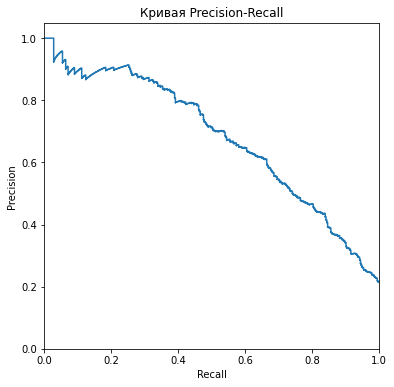

CPU times: user 778 ms, sys: 23.9 ms, total: 802 ms
Wall time: 808 ms


In [ ]:
%%time
model = RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, n_estimators=100)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.2, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()     

**Исследование precision_recall_curve** Чем выше кривая, тем лучше модель. По умолчанию порог 0,5, смотрим соотношения точности и полноты меняя значения порога. 

0.85216006629607


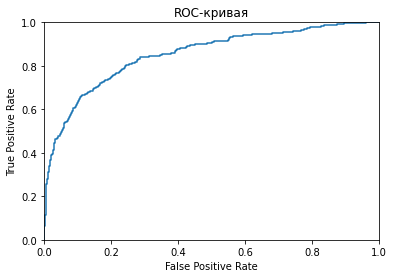

CPU times: user 681 ms, sys: 7.96 ms, total: 689 ms
Wall time: 702 ms


In [ ]:
%%time
model = RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, n_estimators=100)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Исследование auc_roc** Площадь под ROC-кривой =  0.85 (доля пар объектов которые алгоритм верно упорядочил). Это хороший результат, подтверждает выбор модели.(В идеальном случае = 1)

**тестирование модели DecisionTreeClassifier**

In [ ]:
%%time
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)
accuracy_score(target_test, test_predictions)
accuracy_test=accuracy_score(target_test, test_predictions)
print("F1:", f1_score(target_test, test_predictions)) 
 

F1: 0.5809128630705395
CPU times: user 24.2 ms, sys: 3.99 ms, total: 28.2 ms
Wall time: 37.6 ms


Проверка выбранной модели на тестовой выборке: F1 несколько снился с 0.59 до 0.58 по сравнению с валидизационной выборкой. 

Порог = 0.20 | Точность = 0.295, Полнота = 0.928
Порог = 0.22 | Точность = 0.295, Полнота = 0.928
Порог = 0.24 | Точность = 0.295, Полнота = 0.928
Порог = 0.26 | Точность = 0.335, Полнота = 0.878
Порог = 0.28 | Точность = 0.335, Полнота = 0.878
Порог = 0.30 | Точность = 0.335, Полнота = 0.878
Порог = 0.32 | Точность = 0.335, Полнота = 0.878
Порог = 0.34 | Точность = 0.335, Полнота = 0.878
Порог = 0.36 | Точность = 0.362, Полнота = 0.844
Порог = 0.38 | Точность = 0.362, Полнота = 0.844
Порог = 0.40 | Точность = 0.362, Полнота = 0.844
Порог = 0.42 | Точность = 0.362, Полнота = 0.844
Порог = 0.44 | Точность = 0.410, Полнота = 0.770
Порог = 0.46 | Точность = 0.537, Полнота = 0.670
Порог = 0.48 | Точность = 0.537, Полнота = 0.670
Порог = 0.50 | Точность = 0.537, Полнота = 0.670
Порог = 0.52 | Точность = 0.537, Полнота = 0.670
Порог = 0.54 | Точность = 0.537, Полнота = 0.670
Порог = 0.56 | Точность = 0.537, Полнота = 0.670
Порог = 0.58 | Точность = 0.580, Полнота = 0.639
Порог = 0.60 | Точно

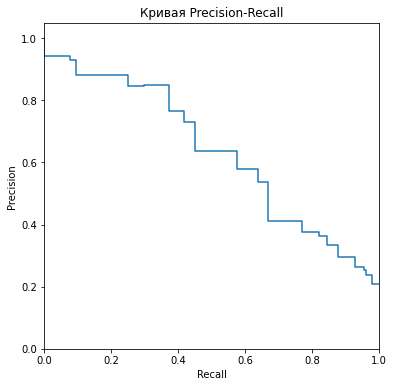

CPU times: user 291 ms, sys: 28 ms, total: 319 ms
Wall time: 329 ms


In [ ]:
%%time
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.2, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()     

**Исследование precision_recall_curve** Чем выше кривая, тем лучше модель. По умолчанию порог 0,5, смотрим соотношения точности и полноты меняя значения порога. 

0.8310244134068074


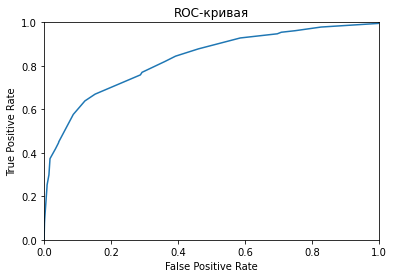

CPU times: user 186 ms, sys: 28 ms, total: 214 ms
Wall time: 221 ms


In [ ]:
%%time
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Исследование auc_roc** Площадь под ROC-кривой =  0.83. Относительно хороший результат.(В идеальном случае = 1), но меньше, чем у RandomForestClassifier. 

**Общие выводы**
-  изучены данные и проведена предварительная обработка
-  выявлен дисбаланс
-  проверены разные модели с перебором гиперпараметров
-  с учетом дисбаланса, требуюшегося показателя F1 на тестовых выборка удалось достичь на 2 моделях:
   - DecisionTreeClassifier ((class_weight='balanced', max_depth=5, random_state=12345)
   - RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, est= 100 )
-  эта модели была простестированы, исследованы Аuc_Roc и Rrecision_recall_curve
-  на тестовой выборке показатель F1 выше 0,59 сохранился только на модели RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=12345, est= 100 )
-  другие методы борьбы с дисбалансом (downsampling, upsampling на модели LogisticRegression) не дали нужный F1. 